### Broadcasting plotting functionality to other packages and routines
The plotting functionality presented here is included in the `GeoDataFrames` of the `geopandas` package and in a Raster class that is a wrapper around rasterio to facilitate indexing and plotting. The inner workings are, however, directly accessible and can be used in any other plotting routine that is built on `matplotlib`.

Here an example is provided on how to use the `Legend` and `PlotParams` objects to decorate `xarray` plotting

In [ ]:
import os
os.chdir("..")

In [2]:
import geomappy as mp
from geomappy.plotting import ScalarPlotParams, Colorbar
from geomappy.basemap import basemap_xticks, basemap_yticks
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
data = xr.open_dataset("data/dis_2019_monthlymeans_cropped_complete.nc")

plotting the data through the xarray package

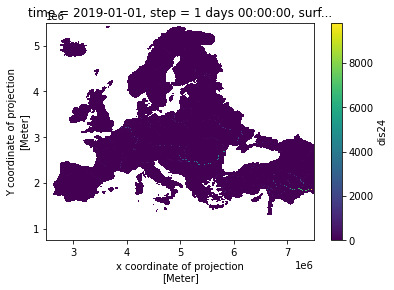

In [4]:
data.isel(time=0)['dis24'].plot()

to make the plot look the same as specified in the `examples.ipynb` notebook `Colorbar` and `ScalarPlotParams` need to be specified

In [5]:
params = ScalarPlotParams(values=data.isel(time=0)['dis24'].values, cmap="Blues", bins=[0,1,2,3,5,10,100,1000])
legend = Colorbar()

from there the `cmap` and `norm` can obtained from `params`

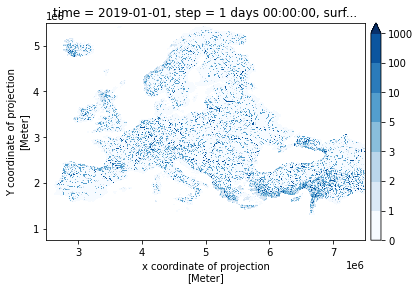

In [6]:
data.isel(time=0)['dis24'].plot(add_colorbar=False, norm=params.norm, cmap=params.cmap)
ax = plt.gca()
legend.draw(ax=ax, params=params)

a basemap can be specified as well (to make it equal to the version present in `examples.ipynb`

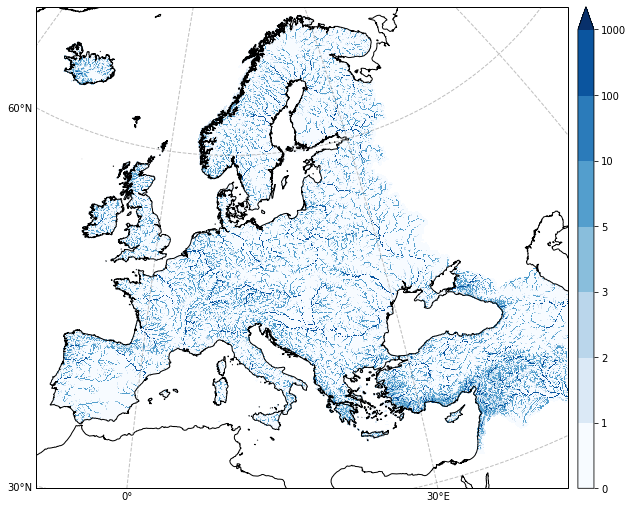

In [7]:
# obtaining bounds from xarray
x0, y0, x1, y1 = [data.x.values.min(), data.y.values.min(), data.x.values.max(), data.y.values.max()]
# creating basemap
ax = mp.basemap(epsg=3035, resolution='10m', xticks=[], yticks=[], xlines=30, ylines=30)
# clip to bounds
ax.set_extent((x0, x1, y0, y1), crs=ccrs.epsg(3035))
basemap_xticks(ax, [0, 30], add=False)
basemap_yticks(ax, [30, 60], add=False)
# xarray plot
data.isel(time=0)['dis24'].plot(add_colorbar=False, add_labels=False, norm=params.norm, cmap=params.cmap, ax=ax)
legend.draw(ax=ax, params=params)